In [1]:
# Quantized LLama
from ctransformers import AutoModelForCausalLM,AutoTokenizer

# Embedding Model
from sentence_transformers import SentenceTransformer, util
from sentence_transformers.util import cos_sim

# Kmeans and PCA 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Plotting
import matplotlib.pyplot as plt

# NLP utilities
import re
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams 
import string

# Python dataframes and arrays
import pandas as pd
import numpy as np

# Misc
from collections import Counter

import requests
import json
import torch
from ctransformers import AutoModelForCausalLM
import random
import pandas as pd

from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from pprint import pprint

### All llama codes

In [56]:
target_url = 'https://Llama-2-70b-chat-dft-serverless.eastus2.inference.ai.azure.com'
api_key = 't8FlgEG09Wlr9MfgXeIDMkJy0kv5eb8R'

def ask_llama(prompt, temp = 1, max_tokens = 10000):
    llm_inputs = {
            "messages":
            [
                { 
                "role": "system", 
                "content": prompt
                }
            ],
            "temperature": temp,
        }
    response = requests.post(f'{target_url}/v1/chat/completions', headers={'Authorization': f'Bearer {api_key}', 'Content-Type': 'application/json'}, data=json.dumps(llm_inputs))
    return(response.json()['choices'][0]['message']['content'])

## Generative AI system types
prompt = "You are a helpful research assistant. For the following set of Survey Responses, briefly summarize the generative systems they are using and also the percentage of respondants who are using that system "+".\n\nSurvey Responses: '" + ''.join(gen_ai_systems.to_list())
msg = ask_llama(prompt)
print(msg)

In [2]:
#Make a coulumn which includes all the AI-system used
df = pd.read_csv("../Data/cleaned_analytic_file_for_viz_290224.csv")
df.head()
df['details_ai_system'] = df['details_ai_system_1_1']
df.loc[df['details_ai_system'].isnull(), 'details_ai_system'] = df.details_ai_system_1
#Make a coulumn which includes all the AI-system used

### Decision support systems details

88.0 %Percent of people using Decision support system mentioned details of the system they are using


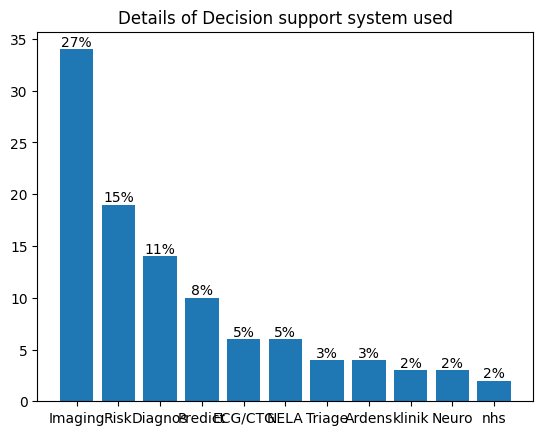

Examples of Imaging include: brainomix, x-ray, CT scan, MRI, Radiology


In [74]:
# Bar chart for the type of DSS AI that applicants use, among those that have mentioned a system. 
dss_ai_systems = df.loc[df['ai_type_use_qs']== 'Diagnostic and decision support system', 'details_ai_system']
used_freq = 100-sum(dss_ai_systems.isnull())/len(dss_ai_systems)*100
print(round(used_freq,0),"%Percent of people using Decision support system mentioned details of the system they are using")
system_list = [['ray', 'imag','scan','mri', 'radio', 'brain', 'oscopy', 'ultra', 'Lung'], 
               ['ecg', 'CTG'], ['risk','risc'],['predict','prog'],['detect','diag'], 'NELA', 'klinik','nhs','Neuro', 'Triage','Ardens']
names = ['Imaging','ECG/CTG', 'Risk','Predict','Diagnos'] + system_list[5:]

## Group details of AI decision support systems
dss_ai_systems = pd.DataFrame(dss_ai_systems)
dss_ai_systems[dss_ai_systems.isna()] = ""
dss_ai_systems['group'] = ""
all_index = [False]*len(dss_ai_systems)
system_users = dict()
for i in range(len(system_list)):
    system = system_list[i]
    name = names[i]
    if(type(system)!=list):
        system = [system]
    index = dss_ai_systems.details_ai_system.apply(lambda x: True if any(ss.lower() in x.lower() for ss in system) else False)
    dss_ai_systems.loc[index[index==True].index,'group'] = dss_ai_systems.loc[index[index==True].index,'group'].apply(lambda x: x+ "," + name if x!="" else name)
    all_index = np.logical_or(all_index,index)
    system_users[''.join(list(name))] = dss_ai_systems[index]
for i in dss_ai_systems.index:
     if dss_ai_systems.loc[i,'group']=="" and dss_ai_systems.loc[i,'details_ai_system']!="":
        dss_ai_systems.loc[i,'group']= "Other"

## Add it to the data frame as a dss_group
df['dss_group'] =""
df.loc[dss_ai_systems.index,'dss_group'] = dss_ai_systems['group']
system_users = dict(sorted(system_users.items(), key=lambda item: len(item[1]), reverse=True))
values = [len(value) for value in system_users.values() if len(value) > 1]
keys = list(system_users.keys())[:len(values)]

plt.bar(keys, values)
# Add number labels on top of each bar
for i in range(len(keys)):
   plt.text(i, values[i], str(round(values[i]/len(dss_ai_systems)*100)) + "%", ha='center', va='bottom')
plt.title('Details of Decision support system used')
plt.show()
print('Examples of Imaging include: brainomix, x-ray, CT scan, MRI, Radiology')
#system_users['all'] = dss_ai_systems

### Generative system details

In [75]:
# Bar chart for the type of Gen AI that applicants use, among those that have mentioned a system. 
gen_ai_systems = df.loc[df['ai_type_use_qs']== 'Generative system', 'details_ai_system']
used_freq = 100-sum(gen_ai_systems.isnull())/len(gen_ai_systems)*100
print(round(used_freq,0),"%Percent of people using generative AI mentioned details of the system they are using")
gen_ai_systems = pd.DataFrame(gen_ai_systems)
gen_ai_systems[gen_ai_systems.isna()] = ""

system_list = [['gp','gbt'],'bard',["accu","acu"], 'pi']
names = ['GPT','Bard','Accurx','Pi']

## Group details of AI decision support systems
gen_ai_systems['group'] = ""
all_index = [False]*len(gen_ai_systems)
system_users = dict()
for i in range(len(system_list)):
    system = system_list[i]
    name = names[i]
    if(type(system)!=list):
        system = [system]
    index = gen_ai_systems.details_ai_system.apply(lambda x: True if any(ss.lower() in x.lower() for ss in system) else False)
    gen_ai_systems.loc[index[index==True].index,'group'] = gen_ai_systems.loc[index[index==True].index,'group'].apply(lambda x: x+ "," + name if x!="" else name)
    all_index = np.logical_or(all_index,index)
    system_users[''.join(list(name))] = gen_ai_systems[index]
for i in gen_ai_systems.index:
     if gen_ai_systems.loc[i,'group']=="" and gen_ai_systems.loc[i,'details_ai_system']!="":
        gen_ai_systems.loc[i,'group']= "Other"

## Add it to the data frame as a gen_group
df['gen_group'] =""
df.loc[gen_ai_systems.index,'gen_group'] = gen_ai_systems['group']


95.0 %Percent of people using generative AI mentioned details of the system they are using


<BarContainer object of 31 artists>

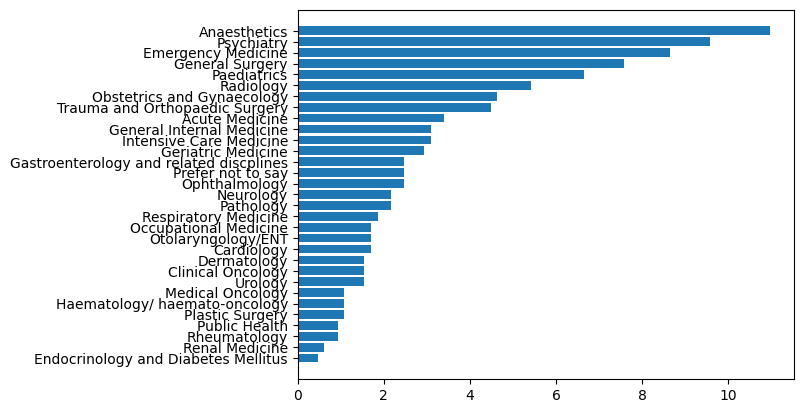

In [18]:
specialists = df.loc[df['main_areas_of_work']!='General Practice', 'main_areas_of_work']
keys, values = np.unique(specialists.dropna(), return_counts=True)
keys = keys[values.argsort()][:-1]
values = sorted(values)[:-1]
plt.barh(keys, values/sum(values)*100)

### llama for decision support systems

In [591]:
## Generative AI system types
prompt = "You are a helpful research assistant. A group of doctors were asked the details of \
diagnosis and decision support AI systems they use for their work. what percent of them use Image processing toolkit? \n survey responses:\n" + ''.join(dss_ai_systems.to_list())
msg = ask_llama(prompt)
print(msg)

  Sure, I can help you with that. Here's a summary of the responses you provided:

* 13% of the doctors use Image processing toolkit
* 11% use Bilirubin level check graph and decision making for treatment
* 10% use Growth chart monitor
* 9% use Rapid AI in Neuroimaging
* 8% use ArdensOrthoview for templating joint replacement surgery
* 7% use Risk stratification
* 6% use EPIC
* 5% use Radiology Reporting system before Radiologist report arrives
* 5% use Endoscopy
* 4% use Predict Prostate cancer UK
* 4% use Briganti predictive tool for lymph node involvement in prostate cancer
* 4% use PREP-S: Risk of complications in Early-onset Pre-eclampsia
* 3% use Endo AID CADe (Olympus)
* 3% use Radiology providers use systems to fast track approval for certain CTs and to triage abnormal CTs
* 3% use NELAVeye lung nodules
* 3% use CVI42 (automatic calculation cardiac volumes)
* 3% use SyngoVia (automatic calculation coronary calcium)
* 2% use NHS app
* 2% use NHS mail
* 2% use Polyp recognition i

In [143]:
## Scenario_1 anaysis
question_scenario_one = "You are using an AI clinical decision-support system which recommends \
treatment options for individual patients. You disagree with the recommendation that is given by \
the system. How would you proceed?"

not_know_lists = ["dont know","don't know", "not know", "not sure", "don’t know"]
df = df.dropna(subset=['scenario_one'])
df['not_know'] = df['scenario_one'].apply(lambda x: 1 if any(ss.lower() in x.lower() for ss in not_know_lists) else 0)

print("Number of people who didn't know:", sum(df['not_know']))
print("Percent of people who don't know:",round(sum(df['not_know'])/len(df)*100,2),"%")
df_filtered = df[df['not_know']== 0]
df_filtered.index = range(len(df_filtered))

Number of people who didn't know: 109
Percent of people who don't know: 11.78 %


In [186]:
paragraph = '\n'.join(df_filtered['scenario_one'][0:10].to_list())
print(paragraph)

I would trust my clinical judgment and  give patient choice about  both options
get help from a senior doctor or colleague
Recheck guideline parameters
Ask peers for advice
Escalate to senior clinician 

Patient management is multifaceted and usually takes into consideration features from the history, examination and investigation findings to decide if treatment is indicated in a patient. I am less likely to be inflexible in my assessment  and decision to treat a patient than an AI.
Consult with another health care specialist with regards to the decision
I would seek other opinions from my colleagues or experts in the field. I would be happy to override the AI recommendation if we see fit.
I would prescribe based on my clinical training and standard guidelines/evidence
It is a supportive system and not an alternative to the human. So I would override it and continue on my own
I will check national and local guidelines before follow AI recommendations or my own decision.

I would choose

In [ ]:
prompt1 = "You are a helpful research assistant. how many times 'don't know' expression has happened in the following chunk of tex:? \
to the following question:" + question_scenario_one+ ".\n\nSurvey Responses: '" + ''.join(df_filtered['scenario_one'][1:100].to_list())

msg = ask_llama(prompt1)
print(msg)

In [184]:
prompt1 = "You are a helpful research assistant. a doctor was asked the following question on using AI for healthcare, \
    can you break their response into topics/themes? Question:" \
+ question_scenario_one+ ".\n\n Response: '" 
prompt2 = "can you break down this paragraph into meaningful sentences without further explanation:\n\n" 
paragraph = '\n'.join(df_filtered['scenario_one'][0:10].to_list())
msg = ask_llama(prompt2+paragraph)
print(msg)


  Sure, here are the meaningful sentences in the given paragraph without further explanation:

1. I would trust my clinical judgment and give patients a choice between the two options.
2. I would seek help from a senior doctor or colleague.
3. I would recheck the guideline parameters.
4. I would ask peers for advice.
5. I would escalate to a senior clinician.
6. Patient management is multifaceted and considers history, examination, and investigation findings.
7. I am less likely to be inflexible in my assessment and decision to treat a patient than an AI.
8. I would consult with another healthcare specialist regarding the decision.
9. I would seek other opinions from colleagues or experts in the field.
10. I would be happy to override the AI recommendation if necessary.
11. I would prescribe based on my clinical training and standard guidelines/evidence.
12. I would override the AI and continue with my own decision.
13. I would check national and local guidelines before following AI re

In [ ]:
all_themes = []
for i in range(10):
    response = df_filtered['scenario_one'][i]
    #print(prompt2+response)
    msg = ask_llama(prompt2+response)
    theme = re.split(r"\n\n", msg)[1]
    all_themes.append(theme)

In [182]:
df_filtered['scenario_one'][0:10]

0    I would trust my clinical judgment and  give p...
1           get help from a senior doctor or colleague
2    Recheck guideline parameters\r\r\nAsk peers fo...
3    Patient management is multifaceted and usually...
4    Consult with another health care specialist wi...
5    I would seek other opinions from my colleagues...
6    I would prescribe based on my clinical trainin...
7    It is a supportive system and not an alternati...
8    I will check national and local guidelines bef...
9    I would choose the treatment option based on t...
Name: scenario_one, dtype: object

['1. I would trust my clinical judgment.\n2. I would give patients a choice about both options.', '1. Get help from a senior doctor.\n2. Get help from a colleague.', '1. Recheck guideline parameters.\n2. Ask peers for advice.\n3. Escalate to senior clinician.', '1. Patient management is multifaceted.\n2. Patient management takes into consideration features from the history, examination, and investigation findings.\n3. These factors are used to decide if treatment is indicated in a patient.\n4. I am less likely to be inflexible in my assessment and decision to treat a patient than an AI.', '1. Consult with another health care specialist.\n2. The consultation is regarding the decision.', '1. I would seek other opinions from my colleagues or experts in the field.\n2. I would be happy to override the AI recommendation if we see fit.', '1. I would prescribe...\n2. ...based on my clinical training...\n3. ...and standard guidelines/evidence.', '1. It is a supportive system.\n2. It is not an a

In [147]:
revised_themes = []
for response in range(10):
    themes = (re.split(r"\n\n", all_themes[i])[1])
    print(themes)
    revised_themes.append(themes)

IndexError: list index out of range

In [205]:
text = df_filtered['scenario_one'][0:10]

### Using Gensim library for topic modelling of each response. 

In [209]:

# Preprocess your text data and create a dictionary and corpus
# Assuming 'texts' is a list of preprocessed documents
texts = df_filtered['scenario_one'][0:10]
dictionary = corpora.Dictionary([texts])
dictionary.doc2bow


In [ ]:
corpus = [dictionary.doc2bow(text) for text in texts]

# Build the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=10)

# Print the topics
pprint(lda_model.print_topics())

# Evaluate coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
# Bar chart for the type of generative AI that applicants use, among those that have mentioned a system
# I should change it to lower case insensitive - done
gen_ai_systems = df.loc[df['ai_type_use_qs']== 'Generative system', 'details_ai_system']
used_freq = 100-sum(gen_ai_systems.isnull())/len(gen_ai_systems)*100
print(round(used_freq,0),"%Percent of people using generative AI mentioned details of the system they are using")
gen_ai_systems = gen_ai_systems.dropna()
gpt_list = ["gp", "gbt"]
bard_list = ["bard"]
accurx_list = ["accu","acu"]
all_list = gpt_list + bard_list + accurx_list
categories, counts = np.unique(gen_ai_systems, return_counts=True)
gpt = sum(gen_ai_systems.apply(lambda x: 1 if "gp" in x.lower()  or "gbt".lower() in x.lower() else 0))/len(gen_ai_systems)*100
bard = sum(gen_ai_systems.apply(lambda x: 1 if "bard" in x.lower() else 0))/len(gen_ai_systems)*100
accurx = sum(gen_ai_systems.apply(lambda x: 1 if ("accu" in x.lower()) or ("acu" in x.lower()) else 0))/len(gen_ai_systems)*100
pi_ai = sum(gen_ai_systems.apply(lambda x: 1 if "pi" in x.lower() else 0))/len(gen_ai_systems)*100

other = gen_ai_systems.apply(lambda x: False if any(ss in x.lower() for ss in all_list) else True)
cat, counts = np.unique(gen_ai_systems[other], return_counts=True)
counts = counts/len(gen_ai_systems)*100
cats = ['GPT','Bard','Accurx','Pi', 'others']
values = [gpt,bard,accurx,pi_ai ,len(counts)/len(gen_ai_systems)*100]
plt.bar(cats, values)
for i in range(len(cats)):
    plt.text(i, values[i], str(round(values[i])) + "%", ha='center', va='bottom')
# Add number labels on top of each bar
plt.title('Details of Generative AI system used')
plt.show()
print("Other systems mentioned:\n")
for x in gen_ai_systems[other]:
    print(x)

I would trust my clinical judgment and  give patient choice about  both options


In [85]:
print(re.split(r"Sure! Here are the main themes extracted from the survey response:\n\n", all_themes[1])[1])

IndexError: list index out of range

In [ ]:
response = df_filtered['scenario_one'][7]
prompt = "You are a helpful research assistant. someone is asked the following question:\n" + question_scenario_one + "\n can you list the main themes in the response (just the themes in the response not your own interpretation)? \n response:\n" \
+  response
msg = ask_llama(prompt + response)
print(msg)

In [ ]:
print(response)

In [ ]:
# Create the regular expression pattern with the variable
for i in range(1,28):
    pattern = re.compile('\n\n' + str(i) + '. ')

# Split the string by the arbitrary number
    splitted_text = pattern.split(msg)
len(splitted_text)
#msg_list = re.split(r'\n\n', msg)
#re.split(r'3. ', msg_list[2])[1]

In [ ]:
msg_list = re.split(r'\n\n', msg)
clean_msg_list = []
for i in range(2,28):
     pattern = re.compile(str(i+1) + '. ')
     text = pattern.split(msg_list[i])[1]
     clean_msg_list = clean_msg_list + [text]
     print(text)

In [ ]:
a = []
for i in range(len(msg_list)):
    j = 0
    flag = 0
    while j<len(df):
        if df['scenario_one'][j] in msg_list[i]:
            a = a + [j]
            flag = 1
            break
        j = j+1
    if flag ==0:
        print(msg_list[i])


In [ ]:
msg_list[1].split('')

In [ ]:
re.split(r'1', msg_list[0])

Decision support system detais

In [ ]:
value, counts = np.unique(dss_ai_systems, return_counts=True)

In [ ]:
print("  Sure, here's a summary of the generative systems used by the respondents in the survey:\n\n1. ChatGPT - This is the most commonly used generative system, with several respondents mentioning that they use it for various tasks such as writing code, creating patient information leaflets, assisting with excel formulae, and generating text for presentations.\n2. Bard - A few respondents mentioned using Bard, either alone or in combination with")

In [ ]:
df.groupby('pmq')[['age','gender','registration_status', 'main_areas_of_work']].describe()

In [ ]:
pi_ai = gen_ai_systems.apply(lambda x: True if "pi" in x.lower() else False)
gen_ai_systems[pi_ai]

In [ ]:
cats, counts  = np.unique(df['pmq'], return_counts=True)
cats = ['EU','Outside EU','UK']
plt.bar(cats, counts/sum(counts)*100)

In [ ]:

#Remove NaNs. 
mask = questions.scenario_one.isnull()
print("number of NaNs in scenario one:",questions.scenario_one.isnull().sum())
questions = questions.dropna(subset=['details_ai_system_1_1'])
print("Number of entries after NaNs removal", len(questions))

#Read Data
aiuse_optimism = questions["aiuse_optimism_aggregated"].tolist() # multiple choice q
scenario_one = questions["scenario_one"].tolist() # free text q